## Zadanie 1

In [1]:
import numpy as np

In [2]:
def exp(lamb):
    u = np.random.uniform()
    return -np.log(1 - u)/lamb

In [3]:
n_iter = 10
signal_time = {}
for i in range(n_iter):
    t = 0
    n_sygnalow = 0
    signal_time[i] = []
    while(t < 90):
        t+=exp(1)
        n_sygnalow+=1
        signal_time[i].append(t)
    
print("Ilość sygnałów: {} \t Suma czasu: {}".format(n_sygnalow, t))

Ilość sygnałów: 101 	 Suma czasu: 90.65148424285074


In [4]:
from matplotlib import pyplot as plt

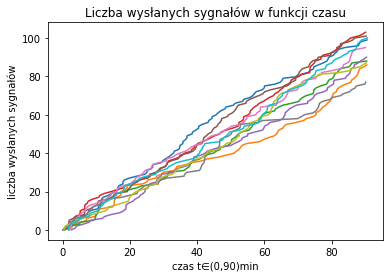

In [5]:
for i in range(n_iter):
    plt.plot(signal_time[i], range (len(signal_time[i])))
plt.xlabel("czas t∈(0,90)min")
plt.ylabel("liczba wysłanych sygnałów")
plt.title("Liczba wysłanych sygnałów w funkcji czasu")
plt.show()

## Zadanie 2

In [6]:
n_tra = 10**4
t_max = [1, 20, 90]
liczba_syg = dict.fromkeys(t_max)

for m in t_max:
    liczba_syg[m] = []
    for i in range(n_tra):
        count = 0
        t = 0
        while(True):
            t += exp(1)
            if(m<t):
                break
            count += 1
        liczba_syg[m].append(count)
    

In [7]:
import math

def silnia(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * silnia(n-1)

def poisson(k,t):
    licz = math.pow(t, k)
    mian = silnia(k)
    return licz/mian * math.pow(math.e, (-t))

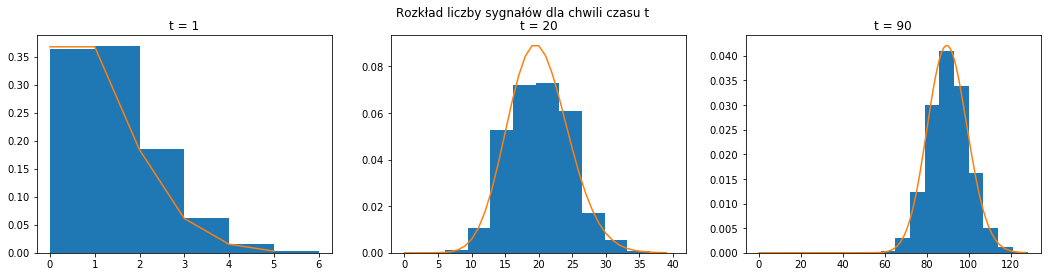

In [8]:
fig, axes = plt.subplots(1,3,figsize=(18, 4)) 
for m, ax in zip(t_max, axes):
    if max(liczba_syg[m]) == 6:
        bins = 6
    else:
        bins = 10
    ax.hist(liczba_syg[m], density=True, bins=bins, label='Rozkład liczby sygnałów')
    ax.set_title("t = {}".format(m))
    Y = []
    for i in range(max(liczba_syg[m])):
        Y.append(poisson(i,m))
    ax.plot(range(max(liczba_syg[m])), Y, label='Rozkład Poissona')
fig.suptitle("Rozkład liczby sygnałów dla chwili czasu t")
plt.show()

## Zadanie 3

In [9]:
k = [2, 5, 10, 50]
n_tra = 10**4
czas_oczekiwania = dict.fromkeys(k)

for i in k:
    czas_oczekiwania[i] = []
    for j in range(n_tra):
        count = 0
        t = 0
        while(True):
            if(i == count):
                break
            count += 1
            t += exp(1)
        czas_oczekiwania[i].append(t)

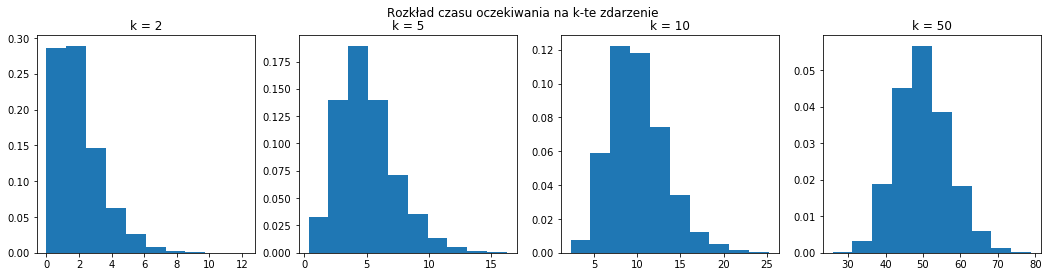

In [10]:
fig, axes = plt.subplots(1,4,figsize=(18, 4)) 
for i, ax in zip(k, axes):
    ax.hist(czas_oczekiwania[i], density=True)
    ax.set_title("k = {}".format(i))
fig.suptitle("Rozkład czasu oczekiwania na k-te zdarzenie")
plt.show()

In [11]:
for i in k:
    E_num = np.average(czas_oczekiwania[i])
    E_an = i/1
    print("Wartość oczekiwana numerczynie dla k = {}: {}".format(i,E_num))
    print("Wartość oczekiwana analitycznie dla k = {}: {}".format(i,E_an))

Wartość oczekiwana numerczynie dla k = 2: 2.005494994924919
Wartość oczekiwana analitycznie dla k = 2: 2.0
Wartość oczekiwana numerczynie dla k = 5: 5.015419841843087
Wartość oczekiwana analitycznie dla k = 5: 5.0
Wartość oczekiwana numerczynie dla k = 10: 10.029481383845157
Wartość oczekiwana analitycznie dla k = 10: 10.0
Wartość oczekiwana numerczynie dla k = 50: 49.86630028646895
Wartość oczekiwana analitycznie dla k = 50: 50.0


In [12]:
for i in k:
    sigma_num = np.std(czas_oczekiwania[i])
    sigma_an = math.sqrt(i)/1
    print("Odchylenie standardowe numerczynie dla k = {}: {}".format(i,sigma_num))
    print("Odchylenie standardowe analitycznie dla k = {}: {}".format(i,sigma_an))

Odchylenie standardowe numerczynie dla k = 2: 1.4225710618338427
Odchylenie standardowe analitycznie dla k = 2: 1.4142135623730951
Odchylenie standardowe numerczynie dla k = 5: 2.244169224880317
Odchylenie standardowe analitycznie dla k = 5: 2.23606797749979
Odchylenie standardowe numerczynie dla k = 10: 3.184000042390594
Odchylenie standardowe analitycznie dla k = 10: 3.1622776601683795
Odchylenie standardowe numerczynie dla k = 50: 7.022791112685463
Odchylenie standardowe analitycznie dla k = 50: 7.0710678118654755
